# Figures for Test 2a

### Test 2a: Cloud Geometrical Depth - Fixed top at ~203.6 K

#### Version 7a: 2024-07-31

* This version include logscale colorbar with SymLogNorm
* Ice Optical Schemes (index associated with config file):
        5.1 Fu 1996 and Fu, Yang & Sun 1998 (Fu: 1O).
        5.2 Yi et al. 2013 (Yi13: 2O).
        5.3 Baran et al. 2016 (Baran16: 3O).
        5.4 Baran et al. 2014 (Baran14: 4O).

### Loading Libraries

In [1]:
import numpy as np # Version used here: 1.23.4 (python 3.8.15)
import pandas as pd # Version used here: 1.5.2 (python 3.8.15)
import xarray as xr # Version used here: 2022.11.0 (python 3.8.15)
from scipy import interpolate # Version used here: 1.10.0 (python 3.8.15)

import matplotlib.pyplot as plt # Version used here: 3.6.2 (python 3.8.15)
import matplotlib.colors as colors

# Project utilities
from project_utilites import crh_diff, crh_rdiff, colorbar_range, cloud_range

%matplotlib notebook

In [2]:
test    = 'test2a'
version = 'v7a'

## Reading data

In [3]:
ecrad_ref_data = xr.open_dataset('2-ecrad_outputs/output_1Dset_' + test + '_1O_' + version + '.nc')
crh_data       = xr.open_dataset('3-crh_matrices/CRH_1Dset_' + test + '_' + version + '.nc')

crh_sw  = crh_data.crh_sw.values
crh_lw  = crh_data.crh_lw.values
crh_net = crh_data.crh_net.values

In [4]:
tropical_profile = pd.read_csv('tropical_profile_ellingson_250m.txt', sep='\s+ ',
                               engine = 'python')

In [5]:
temp_int       = interpolate.interp1d(tropical_profile['pressure (hPa)'].iloc[::-1]*100,
                                      tropical_profile['temperature (K)'].iloc[::-1])
temperature_hl = temp_int(ecrad_ref_data.pressure_hl.values)

altitude_int   = interpolate.interp1d(tropical_profile['pressure (hPa)'].iloc[::-1]*100,
                                      tropical_profile['height (km)'].iloc[::-1])
altitude_hl    = altitude_int(ecrad_ref_data.pressure_hl.values)

In [6]:
temp            = pd.Series(temperature_hl[0])
tropopause_i    = temp.argmin()
upper_limit_i   = (temp.iloc[tropopause_i:] - 201).abs().argmin()
lower_limit_i   = (temp.iloc[tropopause_i:] - 236).abs().argmin()
temp_range      = temp.iloc[tropopause_i+upper_limit_i:tropopause_i+lower_limit_i+1]
melting_layer_i = (temp - 273.15).abs().argmin()
melting_layer   = temp.iloc[melting_layer_i]
tropopause      = temp.min()

altitude_hl_pd  = pd.Series(altitude_hl[0])

In [8]:
geom_depths = np.arange(.5, 5.25, .25)

Bottom cloud temperature with fixed top:

In [24]:
bottom_temp = []
for gdepthii in geom_depths:
    loc_position = (altitude_hl_pd - (15 - gdepthii)).abs().argmin() # 'loc' position is label in index data frame column
    bottom_temp.append(round(temp.loc[loc_position]))

## Figure S07. CRHs:

In [9]:
print(crh_sw.max())
print(crh_lw.max())
print(crh_net.max())
print(crh_sw.min())
print(crh_lw.min())
print(crh_net.min())

28.94700932215884
65.3336518755262
81.47884489755738
-0.7588561305094422
-14.89151347331057
-1.9896629673023707


For SymLogNorm:

In [10]:
vmin, vmax, linthresh, linscale, maj_tickbar, min_tickbar = colorbar_range(crh_data)

In [11]:
vmin, vmax, linthresh, linscale

(-90.0, 90.0, 1, 0.1)

Values can be adjusted if the function doesn't give a reasonable colorbar parameters:

In [12]:
# vmin      = -200
# vmax      = 200
# linthresh = .001
linscale  = 0.5

Max and min lines for each case:

In [13]:
datain_path  = '1-ecrad_inputs/'
sw_ranges, lw_ranges, net_ranges = cloud_range(datain_path, test, version, crh_data, diff = False)

In [14]:
sw_ranges, lw_ranges, net_ranges

(array([[ 0.18445233, 23.73434649],
        [ 0.19424959, 20.21911864],
        [-0.06036456, 27.66037982],
        [ 0.095552  , 28.94700932]]),
 array([[ -9.55986632,  54.32942692],
        [ -8.1305757 ,  51.54950617],
        [-14.89151347,  65.33365188],
        [ -8.32746841,  52.52062167]]),
 array([[ 0.80384536, 69.46045744],
        [ 0.71208495, 65.10648733],
        [-1.98966297, 81.4788449 ],
        [ 0.54588992, 71.58725964]]))

<IPython.core.display.Javascript object>


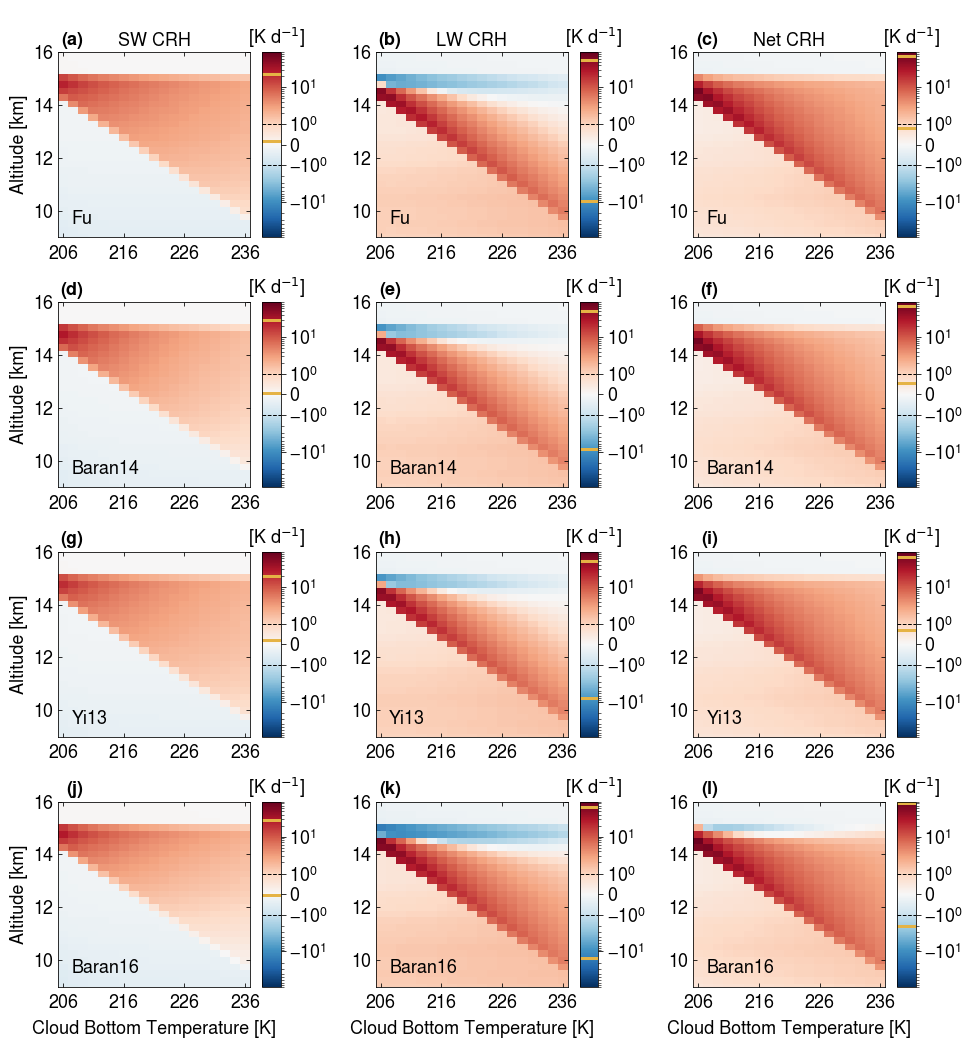

In [16]:
fontname = 'Nimbus Sans' # Arial
fontsize = 18
fheigth  = 14.5 # inches
flength  = 13.5 # inches

rows    = 4
columns = 3
f, ax   = plt.subplots(rows, columns, figsize = (flength, fheigth), dpi = 72)
plt.subplots_adjust(top = 0.95, bottom = 0.055, left = 0.06, right = 0.96, 
                    hspace = .35, wspace = .325)

# Colorbar label position
labelpad     = -52
cb_label_pos = 1.14

Sch_order = [0, 3, 1, 2] # Fu, Baran14, Yi13 and Baran16
for opt in range(rows):
    sch = Sch_order[opt]
    coli = 0
    for comp in ['sw', 'lw', 'net']:
        im = ax[opt, coli].imshow(eval('crh_' + comp)[sch], 
                                  cmap = 'RdBu_r', aspect = 'auto',
                                  norm = colors.SymLogNorm(linthresh, linscale, base = 10,
                                                           vmin = vmin, vmax = vmax)) 
        cbar = plt.colorbar(im, aspect = 10, pad = 0.05)
        cbar.ax.axhline(eval(comp + '_ranges')[sch, 0], c = (229/255, 179/255, 69/255), linewidth = 3)
        cbar.ax.axhline(eval(comp + '_ranges')[sch, 1], c = (229/255, 179/255, 69/255), linewidth = 3)
        cbar.ax.axhline(linthresh, c = 'black', linewidth = 1, linestyle = 'dashed')
        cbar.ax.axhline(-linthresh, c = 'black', linewidth = 1, linestyle = 'dashed')
        cbar.set_label(r'[K d$^{-1}$]', labelpad = labelpad, y = cb_label_pos, rotation=0, 
                       fontsize = fontsize, fontname = fontname)
        cbar.ax.yaxis.set_ticks(maj_tickbar, major = True)
        cbar.ax.yaxis.set_ticks(min_tickbar, minor = True)
        cbar.ax.tick_params(labelsize = fontsize, which = 'major', length = 5)
        cbar.ax.tick_params(which = 'minor', length = 2.5)
        for tick in cbar.ax.get_yticklabels():
            tick.set_fontname(fontname)
        if opt == 0:
            if comp == 'net': frame_title = comp.capitalize()
            else: frame_title = comp.upper()
            ax[opt, coli].set_title(frame_title + ' CRH', color = 'black',
                                    fontsize = fontsize, fontname = fontname,
                                    y = 1)
        coli += 1

# AXIS PARAMETERS
# Y Axis: altitude tickLabels are rounded for visualization:
yticks      = np.arange(0, crh_net.shape[1] + 1, 8) # altitude tick labels
yticklabels = (altitude_hl_pd.loc[yticks].round(1)-.1).astype('int').to_list()
    
# X Axis:
xticks      = np.arange(0, 24, 6)
xticklabels = []
for ticki in xticks: xticklabels.append(bottom_temp[ticki])
    
OptSch          = ['Fu', 'Yi13', 'Baran16', 'Baran14']
panel_letters   = ['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)','(i)','(j)','(k)','(l)']
panel_letters_i = 0
for opt in range(rows):
    sch = Sch_order[opt]
    for j in range(columns):
        # Horizontal Lines:
        #h = ax[j,i].axhline(y = melting_layer_i, linestyle = 'dashed', color = 'grey',
        #                    dashes = (3, 2), linewidth  =2)
        #h = ax[j,i].axhline(y = tropopause_i, linestyle = 'dashed', color = 'grey',
        #                    dashes = (3, 2), linewidth  =2)
        if opt == 3:
            ax[opt, j].set_xlabel(r'Cloud Bottom Temperature [K]', 
                                  fontsize = fontsize, fontname = fontname,
                                  color ='black', labelpad = 7.5)
        ax[opt, j].tick_params(axis = 'x', which = 'major', color = 'black',
                               size = 4, direction = 'in', top = True,
                               labelsize = fontsize, pad = 7.5)
        for tick in ax[opt, j].get_xticklabels():
            tick.set_fontname(fontname)
        ax[opt, j].set_xticks(xticks)
        ax[opt, j].set_xticklabels(xticklabels) #[::-1]
        ax[opt, j].tick_params(axis = 'y', which = 'major', color = 'black',
                               size = 4, direction = 'in', right = True,
                               labelsize = fontsize, pad = 5)
        for tick in ax[opt, j].get_yticklabels():
            tick.set_fontname(fontname)
        ax[opt, j].set_yticks(yticks)
        ax[opt, j].set_yticklabels(yticklabels)
        if j == 0:
            ax[opt, j].set_ylabel('Altitude [km]', fontsize = fontsize, fontname = fontname,
                                  color ='black', labelpad = 5)
        ax[opt, j].text(0.07, 0.05, OptSch[sch],
                        ha = 'left', va = 'bottom', transform = ax[opt, j].transAxes,
                        fontsize = fontsize, fontname = fontname, color = 'black')

        ax[opt, j].set_ylim((altitude_hl_pd - 9).abs().argmin(), (altitude_hl_pd - 16).abs().argmin())
        
        # Panel letters:
        ax[opt, j].text(0.13, 1.11, panel_letters[panel_letters_i], weight = 'bold',
                        ha = 'right', va = 'top', transform = ax[opt, j].transAxes,
                        fontsize = fontsize, fontname = fontname, color = 'black')
        panel_letters_i += 1
        
# Save Figure:
#plt.savefig('paper_figures/fs07.pdf', dpi = 300)

## Figure 03. CRH interscheme difference for Test 2a:

In [9]:
crh_diff_ds = crh_diff(crh_data, test)

In [10]:
# Shortwave CRH differences:
print('Shortwave CRH Differences:')
print('Yi - Fu max: ', crh_diff_ds.crhd_sw.values[0].max())
print('Yi - Fu min: ', crh_diff_ds.crhd_sw.values[0].min())
print('Baran2014 - Fu max: ', crh_diff_ds.crhd_sw.values[2].max())
print('Baran2014 - Fu min: ', crh_diff_ds.crhd_sw.values[2].min())
print('Baran2016 - Fu max: ', crh_diff_ds.crhd_sw.values[1].max())
print('Baran2016 - Fu min: ', crh_diff_ds.crhd_sw.values[1].min())

print('')
# Longwave CRH differences:
print('Longwave CRH Differences:')
print('Yi - Fu max: ', crh_diff_ds.crhd_lw.values[0].max())
print('Yi - Fu min: ', crh_diff_ds.crhd_lw.values[0].min())
print('Baran2014 - Fu max: ', crh_diff_ds.crhd_lw.values[2].max())
print('Baran2014 - Fu min: ', crh_diff_ds.crhd_lw.values[2].min())
print('Baran2016 - Fu max: ', crh_diff_ds.crhd_lw.values[1].max())
print('Baran2016 - Fu min: ', crh_diff_ds.crhd_lw.values[1].min())

print('')
# Net CRH differences:
print('Net CRH Differences:')
print('Yi - Fu max: ', crh_diff_ds.crhd_net.values[0].max())
print('Yi - Fu min: ', crh_diff_ds.crhd_net.values[0].min())
print('Baran2014 - Fu max: ', crh_diff_ds.crhd_net.values[2].max())
print('Baran2014 - Fu min: ', crh_diff_ds.crhd_net.values[2].min())
print('Baran2016 - Fu max: ', crh_diff_ds.crhd_net.values[1].max())
print('Baran2016 - Fu min: ', crh_diff_ds.crhd_net.values[1].min())

Shortwave CRH Differences:
Yi - Fu max:  0.08047325899191166
Yi - Fu min:  -3.5152278516549202
Baran2014 - Fu max:  5.212662830293112
Baran2014 - Fu min:  -1.267516964964324
Baran2016 - Fu max:  3.9260333284171303
Baran2016 - Fu min:  -1.240221704081554

Longwave CRH Differences:
Yi - Fu max:  1.806291486812467
Yi - Fu min:  -3.1307707657507393
Baran2014 - Fu max:  1.6345245218751718
Baran2014 - Fu min:  -2.552791577098155
Baran2016 - Fu max:  11.004224959598446
Baran2016 - Fu min:  -5.416724991053854

Net CRH Differences:
Yi - Fu max:  0.06248443378901625
Yi - Fu min:  -4.353970102184533
Baran2014 - Fu max:  6.796214904284213
Baran2014 - Fu min:  -2.5025029475074234
Baran2016 - Fu max:  12.01838746207659
Baran2016 - Fu min:  -5.054461519716662


For SymLogNorm (Only considering Fu scheme in this case):

In [12]:
vmin, vmax, linthresh, linscale, maj_tickbar, min_tickbar = colorbar_range(crh_diff_ds, test, diff = True)

In [13]:
vmin, vmax, linthresh, linscale

(-20.0, 20.0, 1, 0.1)

Values can be adjusted if the function doesn't give a reasonable colorbar parameters:

In [14]:
linthresh = .1
linscale  = .1

Max and min lines for each case:

In [15]:
datain_path = '1-ecrad_inputs/'
sw_ranges, lw_ranges, net_ranges = cloud_range(datain_path, test, version, crh_diff_ds, diff = True)

In [16]:
sw_ranges, lw_ranges, net_ranges

(array([[-3.51522785,  0.00979726],
        [-1.2402217 ,  3.92603333],
        [-1.26751696,  5.21266283]]),
 array([[-3.13077077,  1.80629149],
        [-5.41672499, 11.00422496],
        [-2.55279158,  1.63452452]]),
 array([[-4.3539701 , -0.09176041],
        [-5.05446152, 12.01838746],
        [-2.50250295,  6.7962149 ]]))

<IPython.core.display.Javascript object>


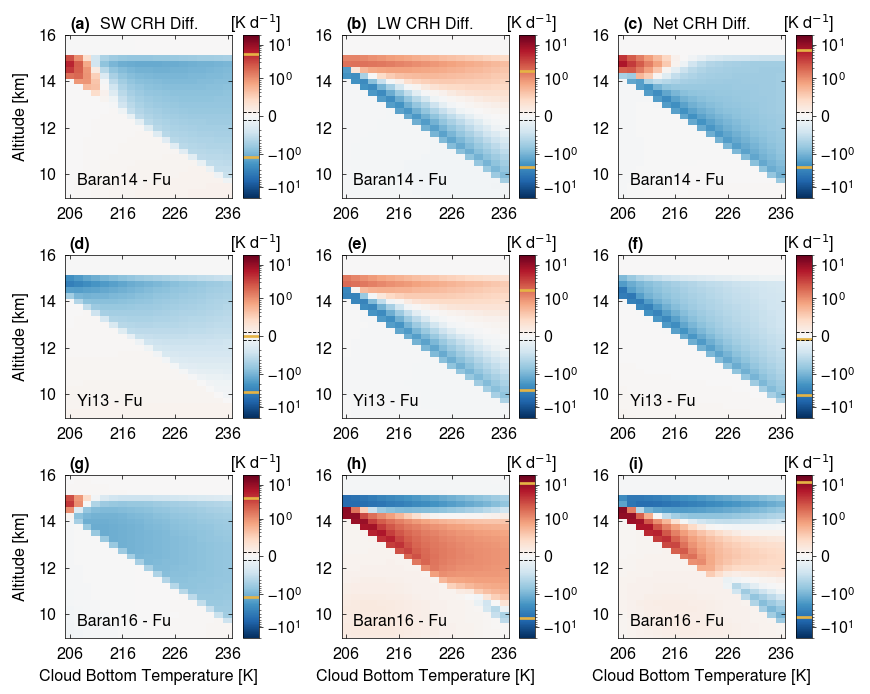

In [17]:
fontname = 'Nimbus Sans' # Arial
fontsize = 18
fheigth  = 10.75 # inches
flength  = 13.5 # inches

rows    = 3
columns = 3
f, ax   = plt.subplots(rows, columns, figsize = (flength, fheigth), dpi = 72)
plt.subplots_adjust(top = 0.95, bottom = 0.08, left = 0.075, right = 0.95, 
                    hspace = .35, wspace = .325)

labelpad     = -52
cb_label_pos = 1.14
IntSch_order = [2, 0, 1] # Baran2014 - Fu, Yi - Fu and Baran2016 - Fu
for opt in range(rows):
    isch = IntSch_order[opt]
    coli = 0
    for comp in ['sw', 'lw', 'net']:
        im = ax[opt, coli].imshow(crh_diff_ds['crhd_' + comp][isch], 
                                  cmap = 'RdBu_r', aspect = 'auto',
                                  norm = colors.SymLogNorm(linthresh, linscale, base = 10,
                                                           vmin = vmin, vmax = vmax)) 
        cbar = plt.colorbar(im, aspect = 10, pad = 0.05)
        cbar.ax.axhline(eval(comp + '_ranges')[isch, 0], c = (229/255, 179/255, 69/255), linewidth = 3)
        cbar.ax.axhline(eval(comp + '_ranges')[isch, 1], c = (229/255, 179/255, 69/255), linewidth = 3)
        cbar.ax.axhline(linthresh, c = 'black', linewidth = 1, linestyle = 'dashed')
        cbar.ax.axhline(-linthresh, c = 'black', linewidth = 1, linestyle = 'dashed')
        cbar.set_label(r'[K d$^{-1}$]', labelpad = labelpad, y = cb_label_pos, rotation=0, 
                       fontsize = fontsize, fontname = fontname)
        cbar.ax.yaxis.set_ticks(maj_tickbar, major = True)
        cbar.ax.yaxis.set_ticks(min_tickbar, minor = True)
        cbar.ax.tick_params(labelsize = fontsize, which = 'major', length = 5)
        cbar.ax.tick_params(which = 'minor', length = 2.5)
        for tick in cbar.ax.get_yticklabels():
            tick.set_fontname(fontname)
        if opt == 0:
            if comp == 'net': frame_title = comp.capitalize()
            else: frame_title = comp.upper()
            ax[opt, coli].set_title(frame_title + ' CRH Diff.', color = 'black',
                                    fontsize = fontsize, fontname = fontname,
                                    y = 1)
        coli += 1

# AXIS PARAMETERS
# Y Axis
yticks      = np.arange(0, crh_diff_ds['crhd_net'].shape[1] + 1, 8) # altitude tick labels
# height tickLabels are rounded for visualization:
yticklabels = (altitude_hl_pd.loc[yticks].round(1) - .1).astype('int').to_list()
    
# X Axis:
xticks      = np.arange(0, 24, 6)
xticklabels = []
for ticki in xticks: xticklabels.append(bottom_temp[ticki])

Diff            = ['Yi13 - Fu', 'Baran16 - Fu', 'Baran14 - Fu']
panel_letters   = ['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)','(i)']
panel_letters_i = 0
for diff in range(rows):
    IntSch = IntSch_order[diff]
    for j in range(columns):
        if diff == 2:
            ax[diff, j].set_xlabel(r'Cloud Bottom Temperature [K]', 
                                   fontsize = fontsize, fontname = fontname,
                                   color ='black', labelpad = 7.5)
        ax[diff, j].tick_params(axis = 'x', which = 'major', color = 'black',
                                size = 4, direction = 'in', top = True,
                                labelsize = fontsize, pad = 10)
        for tick in ax[diff, j].get_xticklabels():
            tick.set_fontname(fontname)
        ax[diff, j].set_xticks(xticks)
        ax[diff, j].set_xticklabels(xticklabels) #[::-1]
        ax[diff, j].tick_params(axis = 'y', which = 'major', color = 'black',
                                size = 4, direction = 'in', right = True,
                                labelsize = fontsize, pad = 10)
        for tick in ax[diff, j].get_yticklabels():
            tick.set_fontname(fontname)
        ax[diff, j].set_yticks(yticks)
        ax[diff, j].set_yticklabels(yticklabels)
        if j == 0:
            ax[diff, j].set_ylabel('Altitude [km]', fontsize = fontsize, fontname = fontname,
                                   color ='black', labelpad = 10)
        ax[diff, j].text(0.07, 0.05, Diff[IntSch],
                         ha = 'left', va = 'bottom', transform = ax[diff, j].transAxes,
                         fontsize = fontsize, fontname = fontname, color = 'black')
        ax[diff, j].set_ylim((altitude_hl_pd - 9).abs().argmin(), (altitude_hl_pd - 16).abs().argmin())
        # Panel letters:
        ax[diff, j].text(0.15, 1.11, panel_letters[panel_letters_i], weight = 'bold',
                         ha = 'right', va = 'top', transform = ax[diff, j].transAxes,
                         fontsize = fontsize, fontname = fontname, color = 'black')
        panel_letters_i += 1


# Save Figure:
#plt.savefig('paper_figures/f03.pdf', dpi = 300)

## CRH interscheme RELATIVE difference:

In [12]:
crh_rdiff_ds = crh_rdiff(crh_diff_ds, crh_data, test)

For SymLogNorm (Only considering Fu scheme in this case):

In [14]:
vmin, vmax, linthresh, linscale, maj_tickbar, min_tickbar = colorbar_range(crh_rdiff_ds, test, diff = True)

In [15]:
vmin, vmax, linthresh, linscale

(-150.0, 150.0, 0.1, 0.1)

Values can be adjusted if the function doesn't give a reasonable colorbar parameters:

In [19]:
# vmin      = -200
# vmax      = 200
linthresh = .001
linscale  = 1

Max and min lines for each case:

In [16]:
datain_path = '1-ecrad_inputs/'
sw_ranges, lw_ranges, net_ranges = cloud_range(datain_path, test, version, crh_rdiff_ds, diff = True)

In [17]:
sw_ranges, lw_ranges, net_ranges

(array([[-0.19947942,  0.0531154 ],
        [-1.32726375,  0.20084315],
        [-0.48196915,  0.27373065]]),
 array([[ -83.27290753,    3.28556031],
        [-144.79057512,    5.78786755],
        [-117.89296567,    4.70673653]]),
 array([[-0.21100078, -0.05104914],
        [-2.1118941 ,  0.23995348],
        [-0.32090182,  0.89956039]]))

<IPython.core.display.Javascript object>


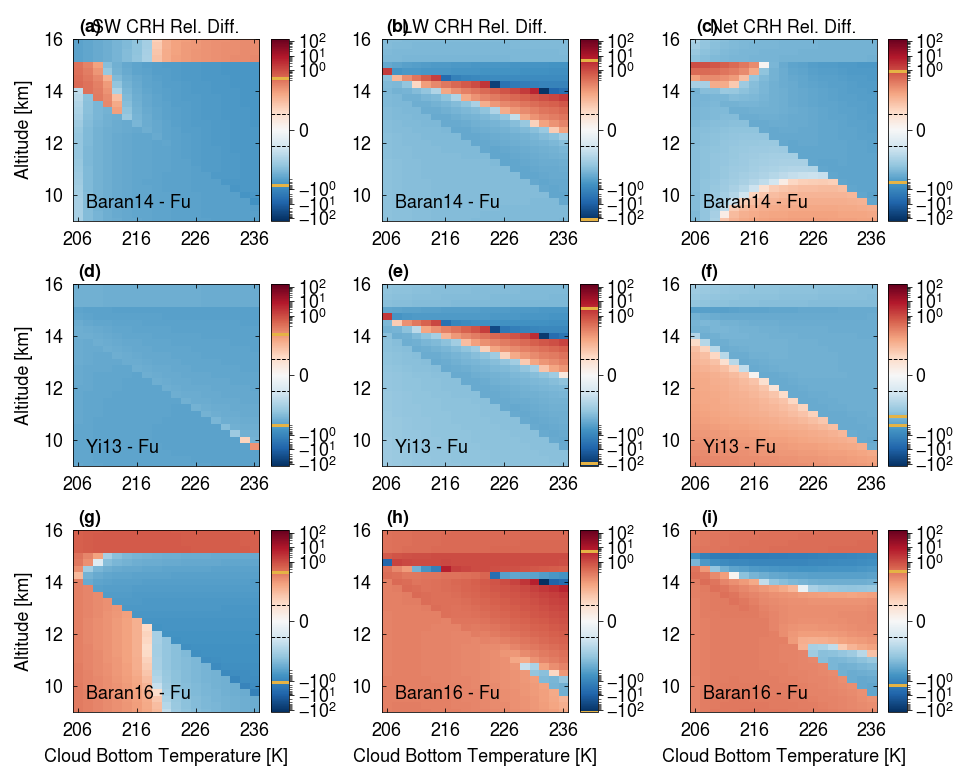

In [20]:
fontname = 'Nimbus Sans' # Arial
fontsize = 18
fheigth  = 10.75 # inches
flength  = 13.5 # inches

rows    = 3
columns = 3
f, ax   = plt.subplots(rows, columns, figsize = (flength, fheigth), dpi = 72)
plt.subplots_adjust(top = 0.95, bottom = 0.08, left = 0.075, right = 0.95, 
                    hspace = .35, wspace = .325)

labelpad     = -52
cb_label_pos = 1.14
IntSch_order = [2, 0, 1] # Baran2014 - Fu, Yi - Fu and Baran2016 - Fu
for opt in range(rows):
    isch = IntSch_order[opt]
    coli = 0
    for comp in ['sw', 'lw', 'net']:
        im = ax[opt, coli].imshow(crh_rdiff_ds['crhrd_' + comp][isch], 
                                  cmap = 'RdBu_r', aspect = 'auto',
                                  norm = colors.SymLogNorm(linthresh, linscale, base = 10,
                                                           vmin = vmin, vmax = vmax)) 
        cbar = plt.colorbar(im, aspect = 10, pad = 0.05)
        cbar.ax.axhline(eval(comp + '_ranges')[isch, 0], c = (229/255, 179/255, 69/255), linewidth = 3)
        cbar.ax.axhline(eval(comp + '_ranges')[isch, 1], c = (229/255, 179/255, 69/255), linewidth = 3)
        cbar.ax.axhline(linthresh, c = 'black', linewidth = 1, linestyle = 'dashed')
        cbar.ax.axhline(-linthresh, c = 'black', linewidth = 1, linestyle = 'dashed')
#         cbar.set_label(r'[%]', labelpad = labelpad, y = cb_label_pos, rotation=0, 
#                        fontsize = fontsize, fontname = fontname)
        cbar.ax.yaxis.set_ticks(maj_tickbar, major = True)
        cbar.ax.yaxis.set_ticks(min_tickbar, minor = True)
        cbar.ax.tick_params(labelsize = fontsize, which = 'major', length = 5)
        cbar.ax.tick_params(which = 'minor', length = 2.5)
        for tick in cbar.ax.get_yticklabels():
            tick.set_fontname(fontname)
        if opt == 0:
            if comp == 'net': frame_title = comp.capitalize()
            else: frame_title = comp.upper()
            ax[opt, coli].set_title(frame_title + ' CRH Rel. Diff.', color = 'black',
                                    fontsize = fontsize, fontname = fontname,
                                    y = 1)
        coli += 1

# AXIS PARAMETERS
# Y Axis
yticks      = np.arange(0, crh_rdiff_ds['crhrd_net'].shape[1] + 1, 8) # altitude tick labels
# height tickLabels are rounded for visualization:
yticklabels = (altitude_hl_pd.loc[yticks].round(1) - .1).astype('int').to_list()
    
# X Axis:
xticks      = np.arange(0, 24, 6)
xticklabels = []
for ticki in xticks: xticklabels.append(bottom_temp[ticki])

Diff            = ['Yi13 - Fu', 'Baran16 - Fu', 'Baran14 - Fu']
panel_letters   = ['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)','(i)']
panel_letters_i = 0
for diff in range(rows):
    IntSch = IntSch_order[diff]
    for j in range(columns):
        if diff == 2:
            ax[diff, j].set_xlabel(r'Cloud Bottom Temperature [K]', 
                                   fontsize = fontsize, fontname = fontname,
                                   color ='black', labelpad = 7.5)
        ax[diff, j].tick_params(axis = 'x', which = 'major', color = 'black',
                                size = 4, direction = 'in', top = True,
                                labelsize = fontsize, pad = 10)
        for tick in ax[diff, j].get_xticklabels():
            tick.set_fontname(fontname)
        ax[diff, j].set_xticks(xticks)
        ax[diff, j].set_xticklabels(xticklabels) #[::-1]
        ax[diff, j].tick_params(axis = 'y', which = 'major', color = 'black',
                                size = 4, direction = 'in', right = True,
                                labelsize = fontsize, pad = 10)
        for tick in ax[diff, j].get_yticklabels():
            tick.set_fontname(fontname)
        ax[diff, j].set_yticks(yticks)
        ax[diff, j].set_yticklabels(yticklabels)
        if j == 0:
            ax[diff, j].set_ylabel('Altitude [km]', fontsize = fontsize, fontname = fontname,
                                   color ='black', labelpad = 10)
        ax[diff, j].text(0.07, 0.05, Diff[IntSch],
                         ha = 'left', va = 'bottom', transform = ax[diff, j].transAxes,
                         fontsize = fontsize, fontname = fontname, color = 'black')
        ax[diff, j].set_ylim((altitude_hl_pd - 9).abs().argmin(), (altitude_hl_pd - 16).abs().argmin())
        # Panel letters:
        ax[diff, j].text(0.15, 1.11, panel_letters[panel_letters_i], weight = 'bold',
                         ha = 'right', va = 'top', transform = ax[diff, j].transAxes,
                         fontsize = fontsize, fontname = fontname, color = 'black')
        panel_letters_i += 1


# Save Figure:
#plt.savefig(out_dir+'f02.pdf', dpi = 300)